In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from geojson import Polygon
import geopandas as gpd

%matplotlib inline
plt.rcParams['figure.figsize'] = (16,10)
        
url = 'https://raw.githubusercontent.com/neha0812/PIMS-BCFSA/master/New_Sample_Clean_latest.csv'

df = pd.read_csv(url, error_bad_lines=False)

In [115]:
df['pct_change'].quantile(0.01)
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df=df[['ADDRESS', 'ASSESSED_VALUE', 'COMM_CODE', 'COMM_NAME', 'LATITUDE',
       'LONGITUDE', 'ROLL_NUMBER', 'Year', 'fsa', 'pct_change',
       'YEAR_OF_CONSTRUCTION', 'saf1', 'saf2', 'saf3', 'saf4', 'saf5', 'saf6',
       'saf7', 'saf8', 'mr5y', 'Inflation', 'pop1', 'pop2', 'pop3', 'pop4',
       'pop5', 'pop6', 'lan1', 'lan2', 'inc1', 'inc2', 'inc3', 'inc4', 'own1',
       'own2', 'own3', 'own4', 'lab1', 'lab2', 'lab3', 'vacancy_rate',
       'walk_score_comm', 'transit_score_comm', 'bike_score_comm',
       'comm_polulation']]
df = df.reset_index()

In [116]:
df['pct_change_bin'] = pd.qcut(df['pct_change'], q=6)

df=df.sort_values('pct_change_bin')

In [117]:
url2 = 'https://raw.githubusercontent.com/firasm/PIMS-BCFSA/master/Community_Boundaries.geojson'

In [118]:
geo = gpd.read_file (url2)

In [119]:
geo = geo[geo['class'] == 'Residential']

geo = geo[['comm_code','geometry']]

geo = geo.reset_index()

In [120]:
geo['vac_rate'] = 0

comms = df.set_index('COMM_CODE').to_dict() 

comvac = {x : 0 for x in comms['ADDRESS']}

In [121]:
for x in comvac:
    tempdf = df[df['COMM_CODE'] == x]['vacancy_rate']
    tempdf = tempdf.reset_index()
    comvac[x] = tempdf.iloc[1][1]
        
scomvac = pd.Series(comvac)
geo['vac_rate'] = pd.Series(scomvac.values)
geo['vac_rate'] = geo['vac_rate'].fillna(0)

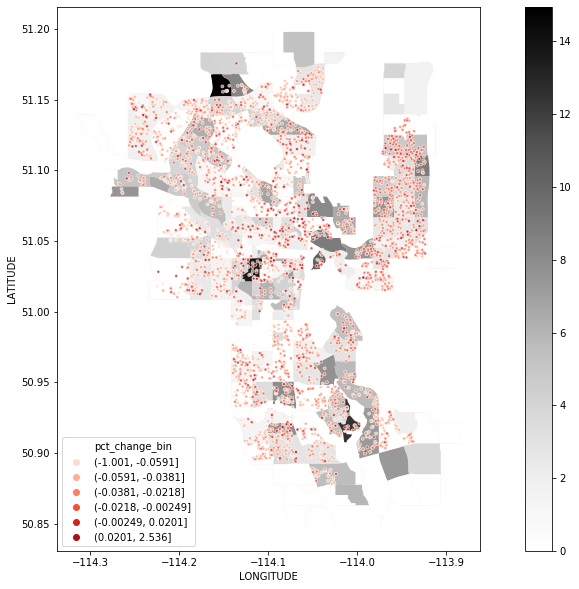

In [122]:
ax = geo.plot()
geo.plot(ax=ax, cmap='Greys', column = 'vac_rate', alpha=1, legend=True)
sns.scatterplot(x= 'LONGITUDE', y='LATITUDE', data = df[df['Year'] == 2017], hue = 'pct_change_bin', ax=ax, marker='.',alpha=0.7)

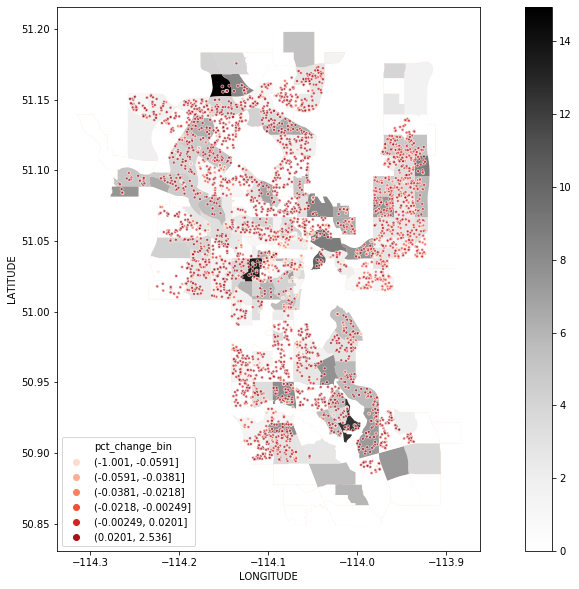

In [123]:
ax = geo.plot()
geo.plot(ax=ax, cmap='Greys', column = 'vac_rate', alpha=1, legend=True)
sns.scatterplot(x= 'LONGITUDE', y='LATITUDE', data = df[df['Year'] == 2018], hue = 'pct_change_bin', ax=ax, marker='.',alpha=0.7)

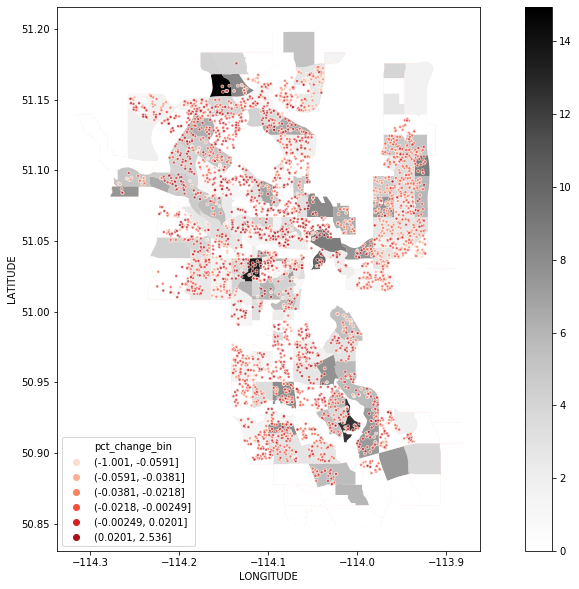

In [124]:
ax = geo.plot()
geo.plot(ax=ax, cmap='Greys', column = 'vac_rate', alpha=1, legend=True)
sns.scatterplot(x= 'LONGITUDE', y='LATITUDE', data = df[df['Year'] == 2019], hue = 'pct_change_bin', ax=ax, marker='.',alpha=0.7)

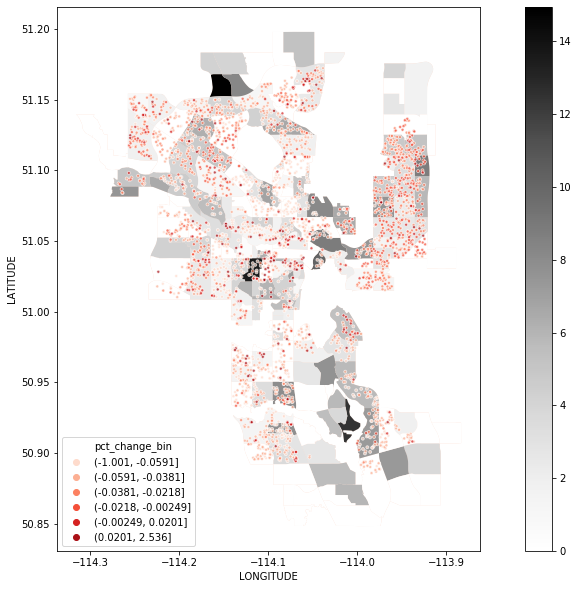

In [125]:
ax = geo.plot()
geo.plot(ax=ax, cmap='Greys', column = 'vac_rate', alpha=1, legend=True)
sns.scatterplot(x= 'LONGITUDE', y='LATITUDE', data = df[df['Year'] == 2020], hue = 'pct_change_bin', ax=ax, marker='.',alpha=0.7)